# DataQuest Project - 4
# Visualizing Earnings Based on College Majors

## Introduction

This is the 4th DataQuest Project in the Data Scientist Pathway, and the 2nd Project in Step 2 - Data Analysis and Visualization.

In this project I'll be analyzing data on the job outcomes of college students who graduated between 2010-2012. The original data was released by the American Community Survey, but the version I am using was cleaned by FiveThirtyEight. 

The goal of this is to analyze this data set to ask questions such as:

1. Do students in more popular majors make more money?
2. How many majors are predominantly male? Predominantly female?
3. Which category of majors have the most students?

## Getting Started

First, the necessary packages of pandas and numpy are loaded, along with the data set.

Then we examine the structure of the data set by displaying the first row as a table, the first 5 and last 5 rows, and get a brief description of the data.


In [19]:
## Load in Packages ##
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

## Load in Data Set ##
recent_grads = pd.read_csv("recent-grads.csv")


In [2]:
## Print first row
print(recent_grads.iloc[0])

## Print first 5 rows
print(recent_grads.head())

## Print Last 5 rows
print(recent_grads.tail())

## Get a description of data

print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

## Data Cleaning

Now rows in the dataset with missing values will be dropped. Only one row of data will be removed:

In [3]:
raw_data_count = recent_grads.shape[0]

print("The number of rows in the original data is %i" % raw_data_count)

recent_grads = recent_grads.dropna()

clean_data_count = recent_grads.shape[0]

print("The number of rows in the cleaned data is %i" % clean_data_count)


The number of rows in the original data is 173
The number of rows in the cleaned data is 172


## Visualization of the Data

### Scatter Plots
Now the data will be explored visually. The following plots will be produced:

1. Sample size vs Median (pay)
2. Sample size vs Unemployment Rate
3. Full Time Jobs vs Median (pay)
4. Percentage of Woman vs Unemployment Rate
5. Men and Median
6. Woman and Median


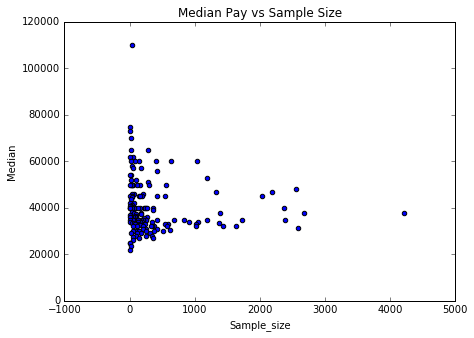

In [4]:
ax1 = recent_grads.plot(x="Sample_size", y="Median", kind="scatter",
                       title = "Median Pay vs Sample Size",
                       figsize=(7, 5))

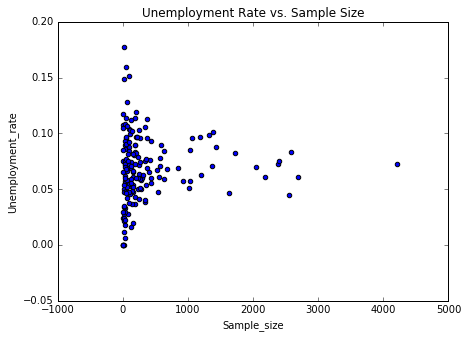

In [5]:
ax2 = recent_grads.plot(x="Sample_size", y = "Unemployment_rate",
                       kind = "scatter", 
                       title = "Unemployment Rate vs. Sample Size",
                       figsize = (7, 5))

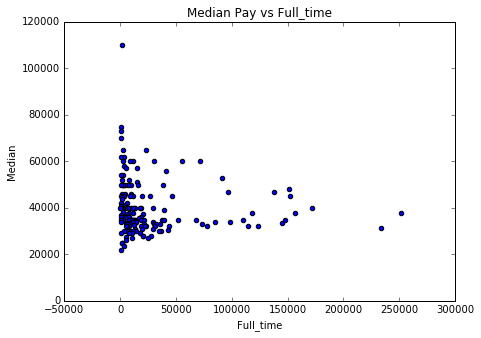

In [6]:
ax2 = recent_grads.plot(x="Full_time", y = "Median",
                       kind = "scatter", 
                       title = "Median Pay vs Full_time",
                       figsize = (7, 5))

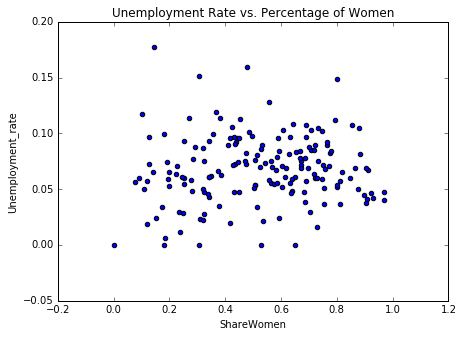

In [7]:
ax2 = recent_grads.plot(x="ShareWomen", y = "Unemployment_rate",
                       kind = "scatter", 
                       title = "Unemployment Rate vs. Percentage of Women",
                       figsize = (7, 5))

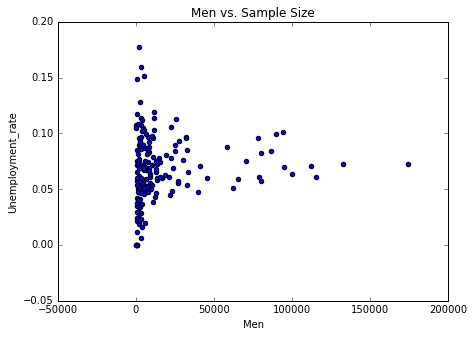

In [8]:
ax2 = recent_grads.plot(x="Men", y = "Unemployment_rate",
                       kind = "scatter", 
                       title = "Men vs. Sample Size",
                       figsize = (7, 5))

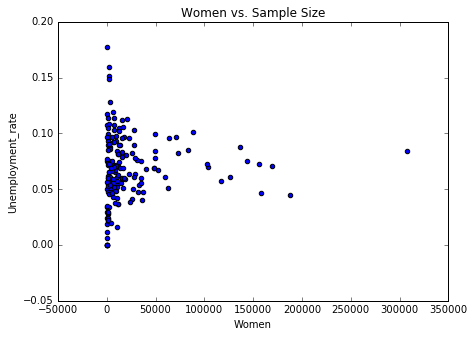

In [9]:
ax2 = recent_grads.plot(x="Women", y = "Unemployment_rate",
                       kind = "scatter", 
                       title = "Women vs. Sample Size",
                       figsize = (7, 5))

There is little correlation in the plots above which indicates, as expected, the the variables plotted have much of an effect on each other. For example, the sample size, assuming it is sufficiently high, would have little effect on the Median Pay of a person having completed a certain college major, or the unemployment rate of people having a college major.

We can try to answer some questions directly by creating more plots.

Question 1: Do students in more popular majors make more money?

We can examine this generally by plotting the total number of people with a major, against the median pay for that major.

Question 2: Do students that majored in subjects that were majority female, make more money?

We can examine this by plotting the percentage of females in a major, by the median pay for that major.

Question 3: Is there a link between the number of full-time employess and median salary?

We have already plotted a graph answering this above, and we see little correlation between the number of full-time employees (35+ hours), and the median pay.

The first two questions we will answer with graphs below:



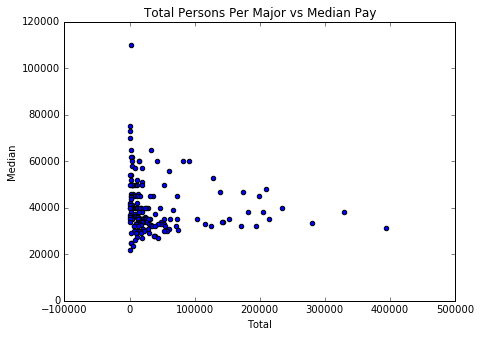

In [10]:
ax2 = recent_grads.plot(x="Total", y = "Median",
                       kind = "scatter", 
                       title = "Total Persons Per Major vs Median Pay",
                       figsize = (7, 5))

We see a slight trend here that majors with more people, tend to have a lower median income. This is only apparent with majors that contain more than 100,000 persons. We can zoom on the graph to get a better understanding of the trends taking place when there are few people and see if this applies still.


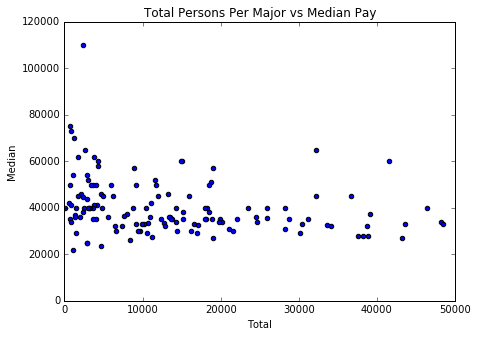

In [11]:
ax2 = recent_grads.plot(x="Total", y = "Median",
                       kind = "scatter", 
                       title = "Total Persons Per Major vs Median Pay",
                       figsize = (7, 5), xlim = [0,50000])

The above plot only examines majors where there are less than 50,000 people. Again there appears to be a trean, although weak, that more popular majors have a lower income.

Now we return to the second question to ask do majors with a majority female population make more money (than those that don't)?

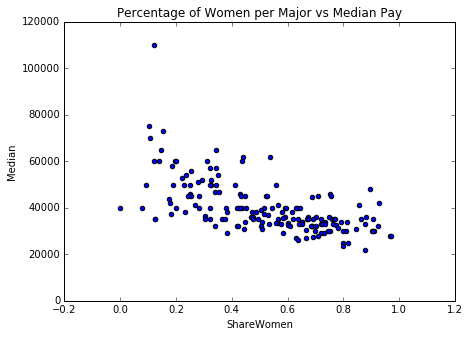

In [12]:
ax2 = recent_grads.plot(x="ShareWomen", y = "Median",
                       kind = "scatter", 
                       title = "Percentage of Women per Major vs Median Pay",
                       figsize = (7, 5))

In the plot above, we observe a negative correlation. The more women by percentage in a given major, the more likely the median income is to be lower.

### Histograms

Histograms allow the the visualization of distributions in data sets and the follow distributions will be displayed:

1. Sample Size
2. Median Income
3. Number Employed
4. Percentage of Woman by Major
5. Unemployment Rate



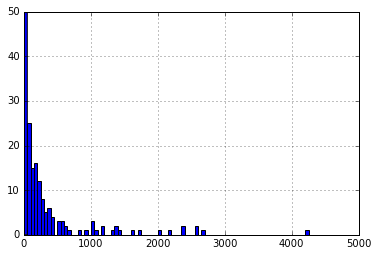

In [13]:
recent_grads["Sample_size"].hist(bins=100, range=(0,5000))

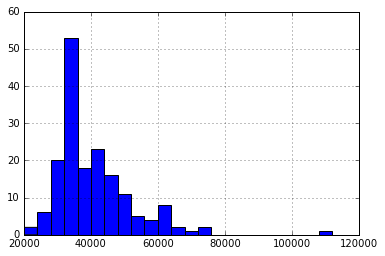

In [14]:
recent_grads["Median"].hist(bins=25, range=(20000,120000))

This graph allows us to examine the common median salary range. We see that most people make a salary between 30k-45k dollars, with the median being ~37k dollars.

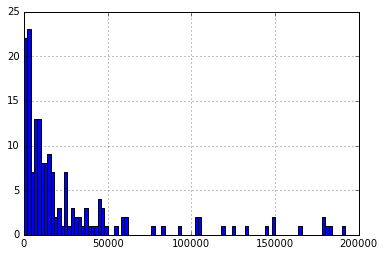

In [15]:
recent_grads["Employed"].hist(bins=100, range=(0,200000))

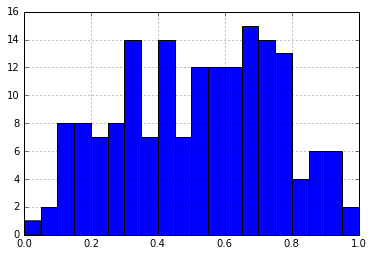

In [16]:
recent_grads["ShareWomen"].hist(bins=20, range=(0,1))

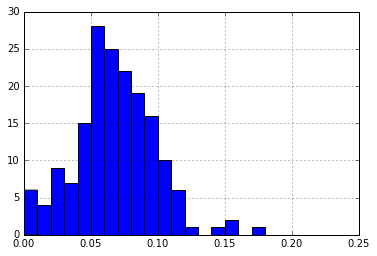

In [17]:
recent_grads["Unemployment_rate"].hist(bins=20, range=(0,0.2))

## Scatter Matrices

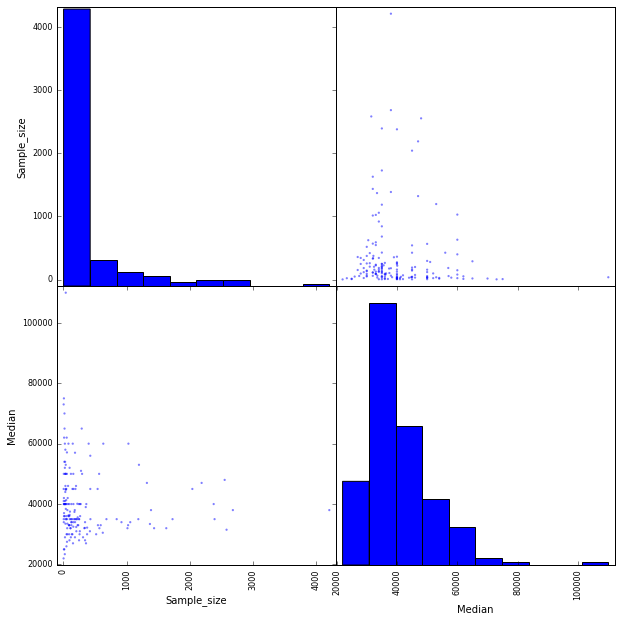

In [20]:
ax = scatter_matrix(recent_grads[["Sample_size", "Median"]],
                   figsize = (10,10))

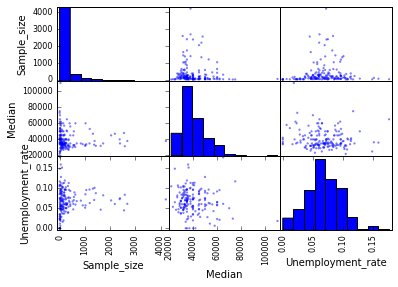

In [21]:
ax = scatter_matrix(recent_grads[["Sample_size", "Median",
                                 "Unemployment_rate"]])

### Bar Plots

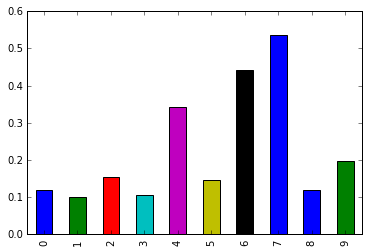

In [22]:
recent_grads[:10]["ShareWomen"].plot(kind="bar")

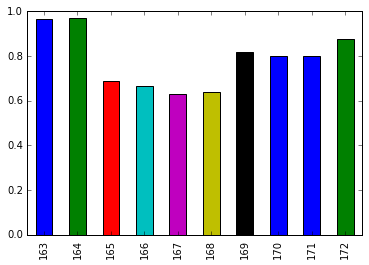

In [26]:
recent_grads[-10:]["ShareWomen"].plot(kind="bar")

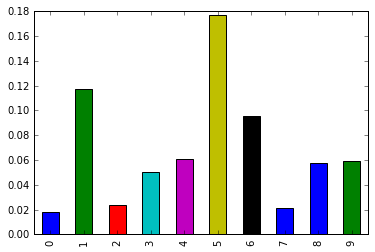

In [28]:
recent_grads[:10]["Unemployment_rate"].plot(kind="bar")

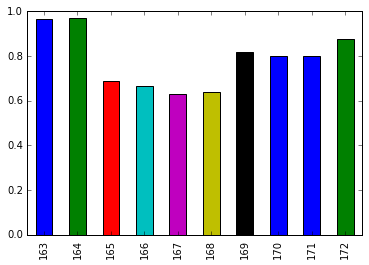

In [29]:
recent_grads[-10:]["ShareWomen"].plot(kind="bar")